In [3]:
# import the packages and libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

In [20]:
# read data into a DataFrame
data = pd.read_csv('/Users/coralineduval/Documents/Ecole/M1-IMT:Singap/Semestre 1/IE5202/data/P1train.csv')

In [21]:
##check the missing values
# find the columns that have missing data, so who don't have the data for the 2498 counties

idx = data.columns[data.count()<2498]
print(idx)
data = data.dropna(0, 'any') #dropping all the rows that have NaN value

Index(['Donald Trump', 'John Kasich', 'Ted Cruz', 'HilaryPercent'], dtype='object')


# Step 1: Simple Regression Model
We are going to develop a simple model that can be used for predicting the response : 'HilaryPercent'

In [91]:
#reading summary statistics of the data
print(data.shape)
data.head()

(2410, 58)


,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,...,AFN120207,BPS030214,LND110210,POP060210,Bernie Sanders,Donald Trump,Hillary Clinton,John Kasich,Ted Cruz,HilaryPercent
0,WI,28493,28743,-0.9,28743,4.5,20.4,19.8,49.2,96.5,...,27186,77,878.97,32.7,2439,3060.0,1732,523.0,2518.0,0.415248
1,TN,28370,28505,-0.5,28522,6.0,21.6,19.7,51.4,87.0,...,15356,5,599.25,47.6,307,1579.0,721,146.0,967.0,0.701362
2,VA,73862,73736,0.2,73750,4.3,19.7,19.4,49.4,93.7,...,57138,418,967.00,76.3,1754,5117.0,1639,807.0,3159.0,0.483053
3,GA,33906,30238,12.1,30233,7.3,29.1,10.2,50.2,78.9,...,34786,412,435.97,69.3,501,2214.0,893,274.0,1476.0,0.640603
4,NY,38679,39372,-1.8,39370,4.2,17.3,21.0,47.9,94.3,...,125639,94,1794.23,21.9,1932,1796.0,708,1184.0,616.0,0.268182


In [92]:
data.describe()

,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,...,AFN120207,BPS030214,LND110210,POP060210,Bernie Sanders,Donald Trump,Hillary Clinton,John Kasich,Ted Cruz,HilaryPercent
count,2.410000e+03,2.410000e+03,2410.000000,2.410000e+03,2410.000000,2410.000000,2410.000000,2410.000000,2410.000000,2410.000000,...,2.410000e+03,2410.000000,2410.000000,2410.000000,2410.000000,2410.000000,2410.000000,2410.000000,2410.000000,2410.000000
mean,1.019929e+05,9.876316e+04,0.337469,9.875966e+04,5.886888,22.594315,17.550207,50.033734,84.483320,10.152531,...,1.891075e+05,340.932780,908.206485,276.733485,3765.837759,4562.554772,5076.377593,1433.021162,2657.186722,0.556666
std,3.265791e+05,3.128692e+05,3.836252,3.128637e+05,1.171402,3.319399,4.321081,2.146760,16.257233,14.993871,...,9.117921e+05,1367.229973,1275.003550,1918.393114,13457.709837,9655.150087,19091.632306,4923.124368,6129.418856,0.158875
min,8.600000e+01,8.200000e+01,-17.000000,8.200000e+01,1.500000,7.400000,4.100000,30.100000,5.900000,0.000000,...,0.000000e+00,0.000000,2.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.253325e+04,1.271900e+04,-2.000000,1.271900e+04,5.200000,20.600000,14.900000,49.600000,78.225000,0.800000,...,6.571000e+03,6.000000,415.232500,21.400000,210.000000,621.250000,341.250000,62.250000,333.000000,0.449061
50%,2.714150e+04,2.712450e+04,-0.300000,2.712450e+04,5.800000,22.500000,17.100000,50.500000,91.300000,2.950000,...,2.524100e+04,32.000000,579.550000,49.050000,655.000000,1620.500000,936.500000,205.000000,930.000000,0.533383
75%,7.048025e+04,7.000600e+04,2.100000,6.999325e+04,6.500000,24.200000,19.800000,51.100000,95.900000,12.750000,...,9.236150e+04,144.750000,884.977500,122.400000,2231.250000,4196.500000,2626.500000,856.250000,2466.250000,0.661416
max,1.011670e+07,9.818664e+06,23.700000,9.818605e+06,13.300000,40.500000,52.900000,55.900000,99.300000,85.100000,...,2.485784e+07,40060.000000,18618.890000,69467.500000,434656.000000,179130.000000,590502.000000,101217.000000,147721.000000,1.000000


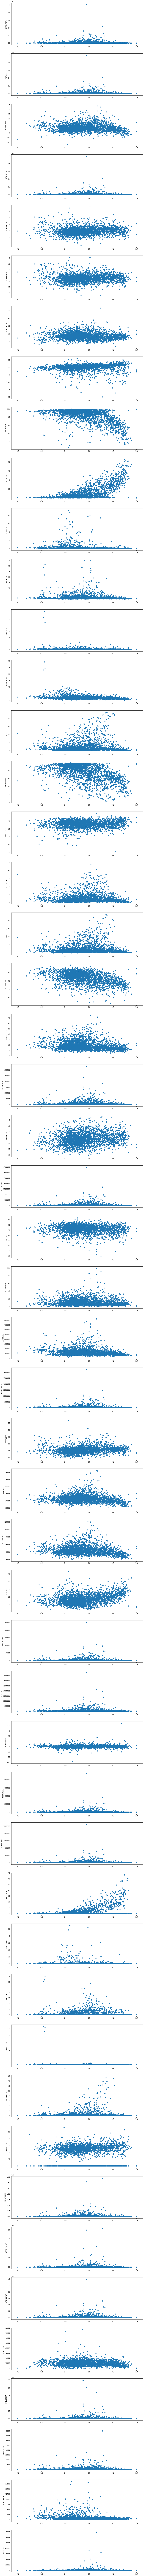

In [94]:
#Graphical Exploration of the Data
# visualize the relationship between the features (columns 2-52) and the response ("HilaryPercent") using scatterplots
i=0
fig=plt.figure(figsize=(15, 300))
# going through columns 1 to 51 in the data set
for col in data.columns:
    if i>0 and i<52:
        ax = fig.add_subplot(51,1,i)
        ax.scatter(y=data[col], x=data["HilaryPercent"])
        plt.ylabel(col)
        i+=1
    else:
        i+=1
plt.show()


In [132]:
# load the functions to be used
%run "/Users/coralineduval/Documents/Ecole/M1-IMT:Singap/Semestre 1/IE5202/data/util_formula.py"

#get all the predictors in one list
predictors=sorted(data)
predictors.remove('state_abbreviation')
predictors.remove('Bernie Sanders')
predictors.remove('Donald Trump')
predictors.remove('Hillary Clinton') 
predictors.remove('John Kasich') 
predictors.remove('Ted Cruz') 
predictors.remove('HilaryPercent')

y = 'HilaryPercent'
fullmodel = modelFitting(y, predictors, data);

# enumerate all models and obtain the results
models = pd.DataFrame({"model":[], "SSE": [], "R2":[], "AR2": [], "AIC": [], "BIC": [], "Pnum":[]})
#we want maximum 5 predictors so we will look for models that have at most 5
for i in range(1,6):
    models = models.append(getAll(i, y, predictors, data));
    
# get the Mallow's Cp Statistic
models = getMallowCp(models, fullmodel)

Processed  51 models on 1 predictors


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Processed  1275 models on 2 predictors
Processed  20825 models on 3 predictors
Processed  249900 models on 4 predictors
Processed  2349060 models on 5 predictors


In [147]:
#We want to minimize AIC to select the “best” model.
findBest(models, 'AIC')

AIC                                               -4280.45
AR2                                              -0.608278
BIC                                               -4245.72
Pnum                                                     5
R2                                               -0.609091
SSE                                                23.7696
model    (EDU635213, HSG495213, INC910213, RHI225214, R...
Cp                                                 391.844
Name: 1440408, dtype: object

In [146]:
print(findBest(models,'AIC')[6]) #to print the line which has the full model detail

('EDU635213', 'HSG495213', 'INC910213', 'RHI225214', 'RHI625214')


In [8]:
#going to compute the model for the 5 predictors given above
model=smf.ols(formula='HilaryPercent~EDU635213+HSG495213+INC910213+RHI225214+RHI625214',data=data).fit()
model.params

Intercept    1.000162e+00
EDU635213   -7.898796e-03
HSG495213   -3.982381e-07
INC910213    9.710374e-06
RHI225214    6.855099e-03
RHI625214   -1.301030e-02
dtype: float64

In [145]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          HilaryPercent   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     749.2
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:22:37   Log-Likelihood:                 2146.2
No. Observations:                2410   AIC:                            -4280.
Df Residuals:                    2404   BIC:                            -4246.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0002      0.028     35.615      0.000       0.945       1.055
EDU635213     -0.0079      0.000    -19.729      0.000      -0.009      -0.007
HSG495213  -3.982e-07   4.38e-08     -9.088      0.000   -4.84e-07   -3.12e-07
INC910213    9.71e-06   6.96e-07     13.944      0.000    8.34e-06    1.11e-05
RHI225214      0.0069      0.000     47.620      0.000       0.007       0.007
RHI625214     -0.0130      0.002     -8.439      0.000      -0.016      -0.010
==============================================================================
Omnibus:                       89.924   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.991
Skew:                          -0.272   Prob(JB):                     4.49e-38
Kurtosis:                       4.190   Cond. No.                     2.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
# create a fitted model for HSG495213 to check if there is multicollinearity
lmHSG495213 = smf.ols(formula='HilaryPercent ~ HSG495213', data=data).fit()

# print the coefficients
lmHSG495213.params

Intercept    6.010053e-01
HSG495213   -3.494870e-07
dtype: float64

In [149]:
# Similarily , I create a fitted model for INC910213
lmINC910213 = smf.ols(formula='HilaryPercent ~ INC910213', data=data).fit()

# print the coefficients
lmINC910213.params

Intercept    0.683301
INC910213   -0.000006
dtype: float64

In [186]:
#Variance inflation factor
print(sms.outliers_influence.variance_inflation_factor(model.model.exog, 0))
print(sms.outliers_influence.variance_inflation_factor(model.model.exog, 1))
print(sms.outliers_influence.variance_inflation_factor(model.model.exog, 2))
print(sms.outliers_influence.variance_inflation_factor(model.model.exog, 3))
print(sms.outliers_influence.variance_inflation_factor(model.model.exog, 4))
print(sms.outliers_influence.variance_inflation_factor(model.model.exog, 5))

192.21831740630856
1.8514535157257976
2.5368450571597743
3.342198273819539
1.1350811730554573
1.1670312684293513


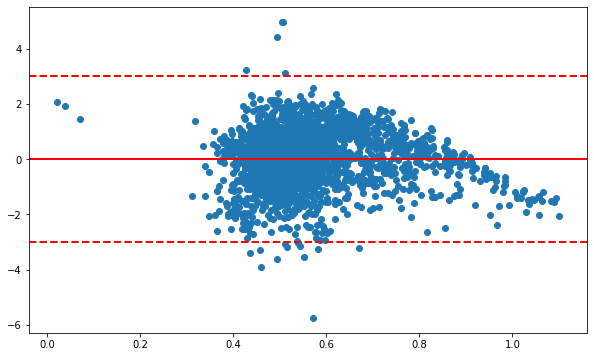

In [82]:
# check the residuals against fitted values
fig = plt.figure(figsize=(10,6))
plt.scatter(model.fittedvalues, model.resid_pearson)
plt.axhline(y=0, linewidth=2, color = 'r')
plt.axhline(y=3, linestyle='dashed', linewidth=2, color = 'r')
plt.axhline(y=-3, linestyle='dashed', linewidth=2, color = 'r')

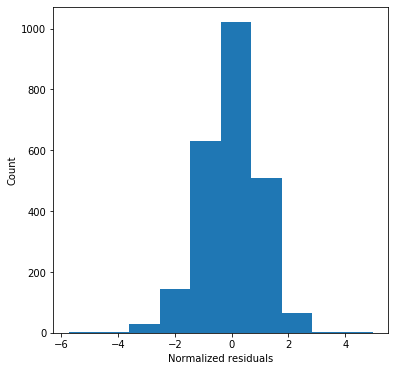

<Figure size 432x432 with 0 Axes>

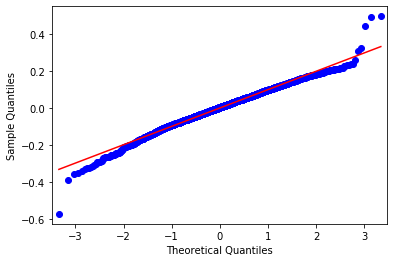

In [167]:
#Testing the assumptions
#Normality check based on the residuals
# get the residuals of the fitted model
res = model.resid

f1 = plt.figure(figsize=(6,6))
f1 = plt.hist(model.resid_pearson)
f1 = plt.ylabel('Count')
f1 = plt.xlabel('Normalized residuals') 

fig = plt.figure(figsize=(6,6))
fig = sm.qqplot(res, stats.distributions.norm, line='r') 

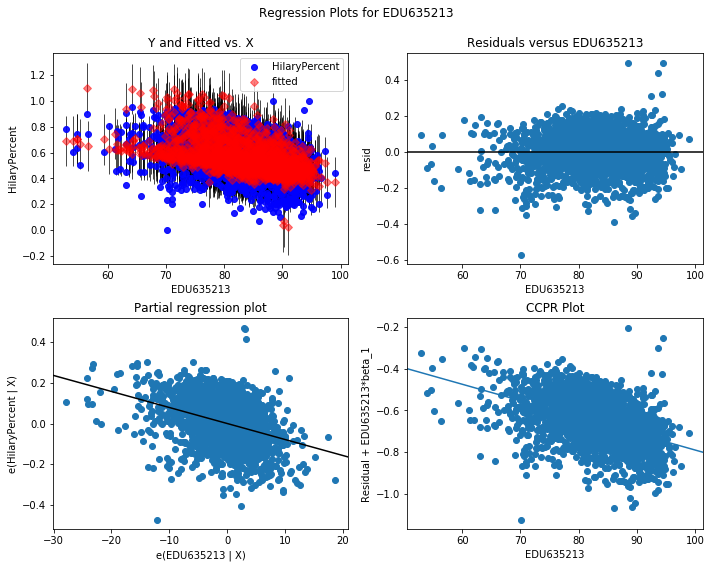

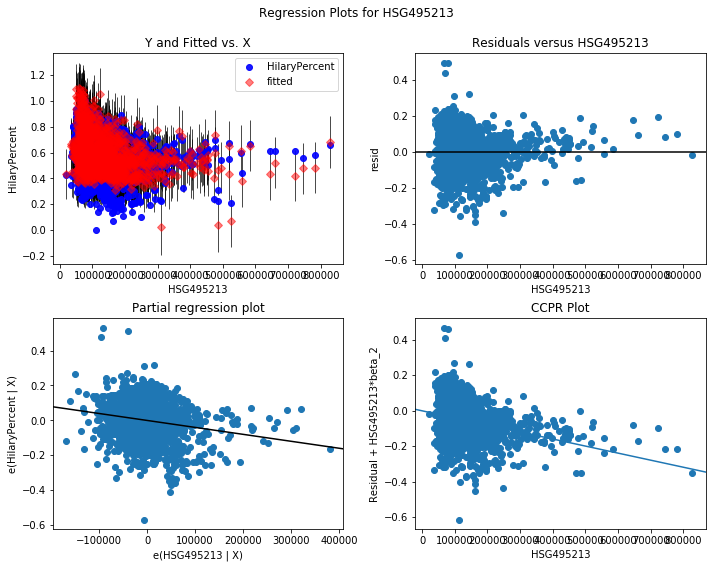

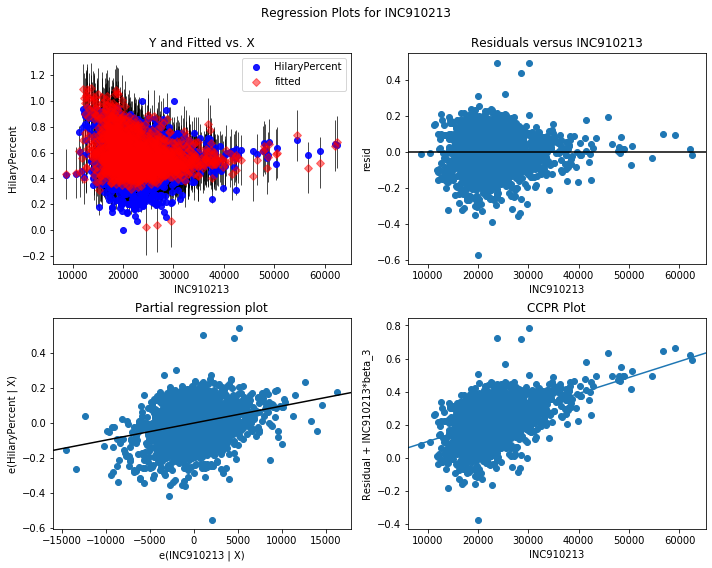

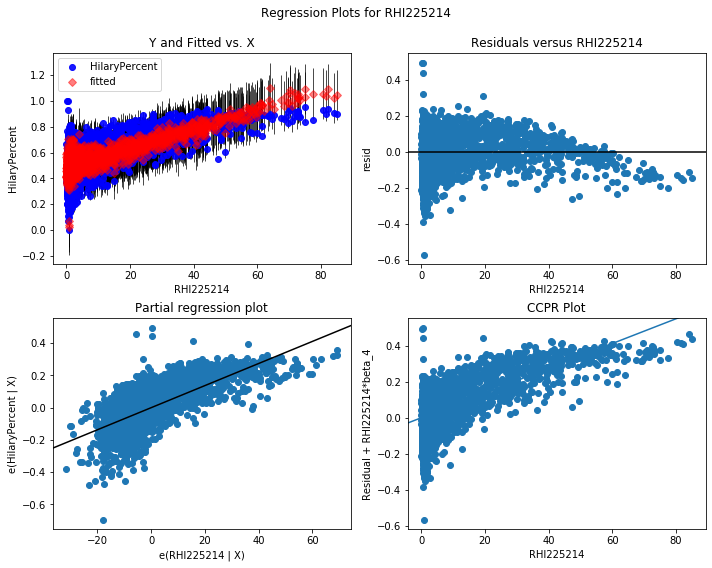

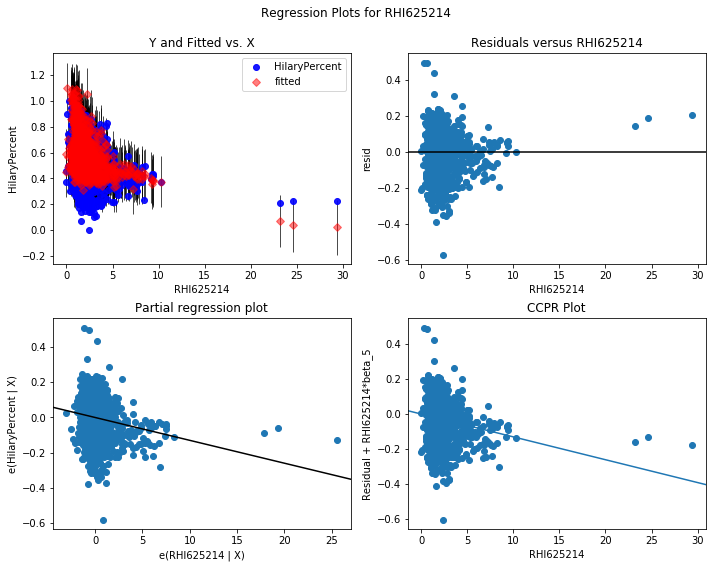

In [83]:
#scatter plot
# regression exog plot
fig1 = plt.figure(figsize=(10,8))
fig1 = sm.graphics.plot_regress_exog(model, "EDU635213", fig=fig1)

fig2 = plt.figure(figsize=(10,8))
fig2 = sm.graphics.plot_regress_exog(model, "HSG495213", fig=fig2)

fig3 = plt.figure(figsize=(10,8))
fig3 = sm.graphics.plot_regress_exog(model, "INC910213", fig=fig3)

fig4 = plt.figure(figsize=(10,8))
fig4 = sm.graphics.plot_regress_exog(model, "RHI225214", fig=fig4)

fig5 = plt.figure(figsize=(10,8))
fig5 = sm.graphics.plot_regress_exog(model, "RHI625214", fig=fig5)

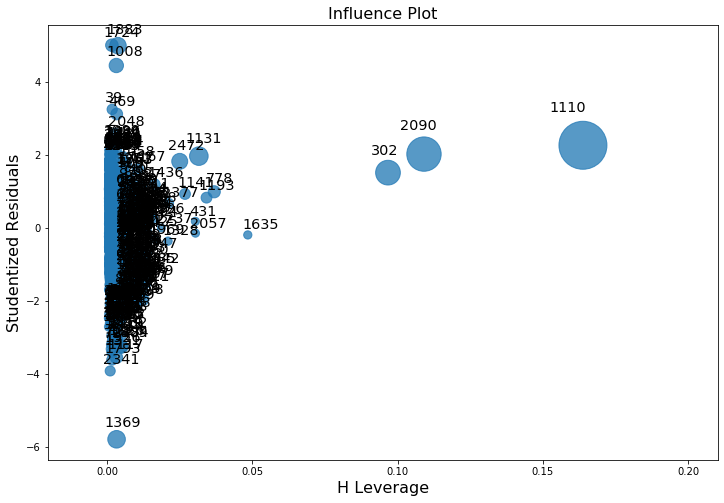

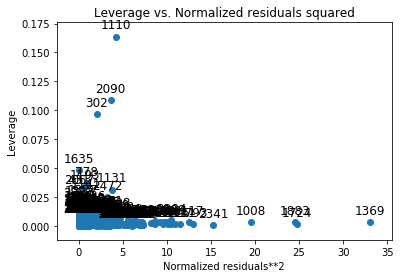

In [86]:
#Influential Points and Outliers
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

fig1 = sm.graphics.plot_leverage_resid2(model, ax=ax)

# Step 2: Full Regression Model

In [146]:
# use forward selection to get the best model
fwmodel = forward(y, predictors, data, 'AIC')
fwmodel.summary()

['RHI225214']
['RHI225214', 'EDU635213']
['RHI225214', 'EDU635213', 'RHI625214']
['RHI225214', 'EDU635213', 'RHI625214', 'INC910213']
['RHI225214', 'EDU635213', 'RHI625214', 'INC910213', 'HSG495213']
['RHI225214', 'EDU635213', 'RHI625214', 'INC910213', 'HSG495213', 'SBO415207']
['RHI225214', 'EDU635213', 'RHI625214', 'INC910213', 'HSG495213', 'SBO415207', 'EDU685213']
['RHI225214', 'EDU635213', 'RHI625214', 'INC910213', 'HSG495213', 'SBO415207', 'EDU685213', 'AGE775214']
['RHI225214', 'EDU635213', 'RHI625214', 'INC910213', 'HSG495213', 'SBO415207', 'EDU685213', 'AGE775214', 'PST120214']
['RHI225214', 'EDU635213', 'RHI625214', 'INC910213', 'HSG495213', 'SBO415207', 'EDU685213', 'AGE775214', 'PST120214', 'RHI825214']
['RHI225214', 'EDU635213', 'RHI625214', 'INC910213', 'HSG495213', 'SBO415207', 'EDU685213', 'AGE775214', 'PST120214', 'RHI825214', 'LND110210']
['RHI225214', 'EDU635213', 'RHI625214', 'INC910213', 'HSG495213', 'SBO415207', 'EDU685213', 'AGE775214', 'PST120214', 'RHI825214', 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          HilaryPercent   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     194.9
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:55:05   Log-Likelihood:                 2322.6
No. Observations:                2410   AIC:                            -4595.
Df Residuals:                    2385   BIC:                            -4451.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4289      0.334      4.279      0.000       0.774       2.084
RHI225214     -0.0009      0.003     -0.293      0.770      -0.007       0.005
EDU635213     -0.0043      0.001     -8.182      0.000      -0.005      -0.003
RHI625214     -0.0275      0.004     -7.533      0.000      -0.035      -0.020
INC910213   1.156e-05   8.46e-07     13.662      0.000     9.9e-06    1.32e-05
HSG495213  -3.875e-07   5.54e-08     -6.989      0.000   -4.96e-07   -2.79e-07
SBO415207      0.0010      0.000      2.217      0.027       0.000       0.002
EDU685213     -0.0040      0.001     -7.640      0.000      -0.005      -0.003
AGE775214      0.0053      0.001      6.451      0.000       0.004       0.007
PST120214      0.0045      0.001      6.660      0.000       0.003       0.006
RHI825214     -0.0092      0.003     -2.809      0.005      -0.016      -0.003
LND110210  -5.383e-06    1.7e-06     -3.172      0.002   -8.71e-06   -2.06e-06
SEX255214      0.0055      0.001      5.128      0.000       0.003       0.008
SBO315207     -0.0014      0.000     -3.789      0.000      -0.002      -0.001
RHI425214     -0.0004      0.004     -0.108      0.914      -0.008       0.007
POP645213     -0.0036      0.001     -4.437      0.000      -0.005      -0.002
AGE135214     -0.0082      0.003     -2.909      0.004      -0.014      -0.003
HSD310213      0.0547      0.016      3.491      0.000       0.024       0.085
POP715213     -0.0020      0.001     -3.139      0.002      -0.003      -0.001
RHI325214     -0.0078      0.003     -2.501      0.012      -0.014      -0.002
LFE305213      0.0010      0.001      1.882      0.060   -4.15e-05       0.002
RHI725214     -0.0067      0.003     -2.141      0.032      -0.013      -0.001
HSG445213     -0.0012      0.000     -2.392      0.017      -0.002      -0.000
HSG096213     -0.0012      0.000     -2.596      0.009      -0.002      -0.000
POP060210   2.188e-06   1.32e-06      1.654      0.098   -4.06e-07    4.78e-06
==============================================================================
Omnibus:                       89.929   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.859
Skew:                          -0.149   Prob(JB):                     7.41e-51
Kurtosis:                       4.487   Cond. No.                     2.62e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
## include interactions in the predictors
cand_2Inter = []
for p1 in predictors:
    for p2 in predictors:
        if p1 == p2:
            cand_2Inter.append(p1);
        else:
            cand_2Inter.append(p1+':'+p2);
                
print(cand_2Inter)
print(len(cand_2Inter))

['AFN120207', 'AFN120207:AGE135214', 'AFN120207:AGE295214', 'AFN120207:AGE775214', 'AFN120207:BPS030214', 'AFN120207:BZA010213', 'AFN120207:BZA110213', 'AFN120207:BZA115213', 'AFN120207:EDU635213', 'AFN120207:EDU685213', 'AFN120207:HSD310213', 'AFN120207:HSD410213', 'AFN120207:HSG010214', 'AFN120207:HSG096213', 'AFN120207:HSG445213', 'AFN120207:HSG495213', 'AFN120207:INC110213', 'AFN120207:INC910213', 'AFN120207:LFE305213', 'AFN120207:LND110210', 'AFN120207:MAN450207', 'AFN120207:NES010213', 'AFN120207:POP010210', 'AFN120207:POP060210', 'AFN120207:POP645213', 'AFN120207:POP715213', 'AFN120207:POP815213', 'AFN120207:PST040210', 'AFN120207:PST045214', 'AFN120207:PST120214', 'AFN120207:PVY020213', 'AFN120207:RHI125214', 'AFN120207:RHI225214', 'AFN120207:RHI325214', 'AFN120207:RHI425214', 'AFN120207:RHI525214', 'AFN120207:RHI625214', 'AFN120207:RHI725214', 'AFN120207:RHI825214', 'AFN120207:RTN130207', 'AFN120207:RTN131207', 'AFN120207:SBO001207', 'AFN120207:SBO015207', 'AFN120207:SBO115207

In [ ]:
# forward selection with interaction considered
model2 = forward(y, cand_2Inter, data, 'AIC')
model2.summary()

In [ ]:
# check the normality of the data
fig = plt.figure(figsize=(6,6))
fig = sm.qqplot(model2.resid, stats.distributions.norm, line='r')

In [ ]:
# check the residuals against fitted values
fig = plt.figure(figsize=(6,6))
plt.scatter(model2.fittedvalues, model2.resid_pearson)
plt.axhline(y=0, linewidth=2, color = 'r')
plt.axhline(y=3, linestyle='dashed', linewidth=2, color = 'r')
plt.axhline(y=-3, linestyle='dashed', linewidth=2, color = 'r')

In [ ]:
## check the leverage and influential points
influence = model2.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
fig = plt.figure(figsize=(6,6))
fig = plt.stem(np.arange(len(c)), c, markerfmt=",") 
data.iloc[c.argmax()]

In [ ]:
#Variance inflation factor
print(sms.outliers_influence.variance_inflation_factor(model.model.exog, 0))
print(sms.outliers_influence.variance_inflation_factor(model.model.exog, 1))
print(sms.outliers_influence.variance_inflation_factor(model.model.exog, 2))
print(sms.outliers_influence.variance_inflation_factor(model.model.exog, 3))
print(sms.outliers_influence.variance_inflation_factor(model.model.exog, 4))
print(sms.outliers_influence.variance_inflation_factor(model.model.exog, 5))

In [ ]:
# use cross validation to evaluate the model performance
from sklearn.cross_validation import KFold

nfold = 6;
kf = KFold(data.shape[0], nfold, shuffle=True)

def CrossValidation(formula, kf, dataset, response):
    results = []
    # evaluate all accuracy based on the folds
    for train_index, test_index in kf:
        d_train, d_test = dataset.ix[train_index,:], dataset.ix[test_index,:]
        lmfit = smf.ols(formula, d_train).fit();
        pred = lmfit.predict(d_test)
        prederror = ((pred - d_test[response]) ** 2).mean();
        results.append(prederror);
        
    # Wrap everything up in a nice dataframe
    return results;

In [ ]:
# read test data into a DataFrame
p1test = pd.read_csv('/Users/coralineduval/Documents/Ecole/M1-IMT:Singap/Semestre 1/IE5202/data/P1test.csv')

In [ ]:
formula = 'HilaryPercent ~ ‘RHI125214:RHI225214 + RHI625214:RHI825214 + HSG096213:RHI825214 + AGE775214:HSG096213 + EDU635213 + INC910213:SEX255214 + HSG495213:POP715213 + HSD410213:RHI225214 + HSG495213:INC110213 + POP645213:RHI825214 + LFE305213:RHI725214 + AGE295214:AGE775214 + HSD310213:RHI225214 + 1'
cverr = CrossValidation(formula, kf,p1test,y)
allmodel = smf.ols(formula, p1test).fit()
mse = allmodel.ssr/allmodel.nobs;
print(np.mean(cverr))
print(mse)

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].scatter(x=list(range(1, nfold+1)), y=cverr)
ax[0].axhline(y=mse, color="r", linewidth=2)
ax[0].axhline(y=np.mean(cverr), color="b", linewidth=2)

In [ ]:
#going to compute the model for the predictors as follow
model2=smf.ols(formula='HilaryPercent ~ RHI125214:RHI225214 + RHI625214:RHI825214 + HSG096213:RHI825214 + AGE775214:HSG096213 + EDU635213 + INC910213:SEX255214 + HSG495213:POP715213 + HSD410213:RHI225214 + HSG495213:INC110213 + POP645213:RHI825214 + LFE305213:RHI725214 + AGE295214:AGE775214 + HSD310213:RHI225214',data=data).fit()
model2.params

In [ ]:
model2.summary()

In [ ]:
#predict the value for hilarypercent
HilaryPercent_predict = model2.predict(p1test)
HilaryPercent_predict.to_csv(r'/Users/coralineduval/Desktop/A0209907X/predictions',columns=None, header=True, index=False, index_label=None))

In [ ]:
#calculating the weighted mean squared errors
wmse=0
predict_train=model2.predict(data)
for i in (data.shape[0]):
    #57th column : hilarypercent, 54: votes for hillary, 52: votes for bernie
    wmse+=(data.iat[i,54]+data.iat[i,52])*(predict_train[i]-data.iat[i,57])**2 
wmse=wmse/data.shape[0]